In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/RitikOnTheRoad/PCA/refs/heads/main/Practice/multicollinear_pca_dataset%20(1).csv')
data.head()

,feature_1 (z1),feature_2 (2*z1),feature_3 (z2),feature_4 (2*z2),feature_5 (z1+z2),noise_feature,target
0,0.416993,1.031278,0.404702,0.785542,0.860763,-1.046911,0.756278
1,-0.168233,-0.322637,0.534982,1.167801,0.401050,0.536653,-1.398874
2,0.647951,1.338857,1.087857,2.169084,1.736855,1.185704,-0.287633
3,1.525379,3.113842,1.030688,2.075257,2.603997,0.718953,2.381566
4,-0.256657,-0.447635,-1.399394,-2.720428,-1.609380,0.996048,2.004604


In [14]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   feature_1 (z1)     200 non-null    float64
 1   feature_2 (2*z1)   200 non-null    float64
 2   feature_3 (z2)     200 non-null    float64
 3   feature_4 (2*z2)   200 non-null    float64
 4   feature_5 (z1+z2)  200 non-null    float64
 5   noise_feature      200 non-null    float64
 6   target             200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

<Axes: >

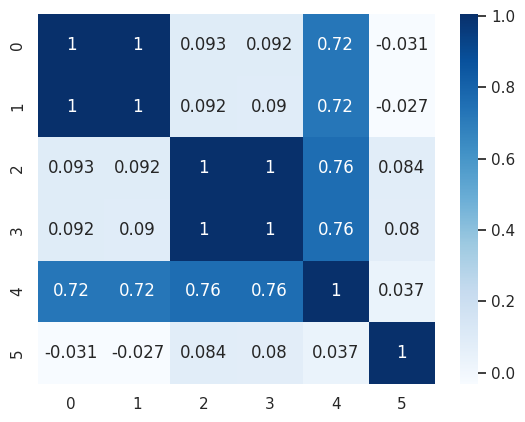

In [15]:
cov_mat=np.cov(X.T)
sns.heatmap(cov_mat,annot=True,cmap='Blues') #high multicolinearity

In [16]:
## Regression without removing multicolinearity

In [19]:
import statsmodels.api as sm

In [20]:
X1=sm.add_constant(X)
sm.OLS(y,X1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.132e+04
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          2.30e-269
Time:                        14:35:26   Log-Likelihood:                 130.68
No. Observations:                 200   AIC:                            -247.4
Df Residuals:                     193   BIC:                            -224.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2827      0.009    -31.194      0.000      -0.301      -0.265
x1             0.4373      0.166      2.634      0.009       0.110       0.765
x2             2.3434      0.189     12.399      0.000       1.971       2.716
x3            -0.6975      0.175     -3.984      0.000      -1.043      -0.352
x4            -1.2465      0.219     -5.692      0.000      -1.678      -0.815
x5            -0.0225      0.222     -0.101      0.919      -0.461       0.416
x6            -0.0006      0.009     -0.070      0.944      -0.019       0.017
==============================================================================
Omnibus:                       11.128   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.986
Skew:                           0.102   Prob(JB):                       0.0827
Kurtosis:                       2.254   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# wow didnt expect this high R2
# lets try train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
x_pred=lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,x_pred)

0.9984593658406555

In [29]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
score

array([0.9973193 , 0.99880585, 0.99814383, 0.99865158, 0.99838166])

In [30]:
# Damn im lost.
#PCA incoming


In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [34]:
pca.explained_variance_ratio_

array([0.53032499, 0.30501608])

In [37]:
X_new=pca.transform(X)
X_new.shape

(200, 2)

In [43]:
X_new=sc.fit_transform(X_new)

<Axes: >

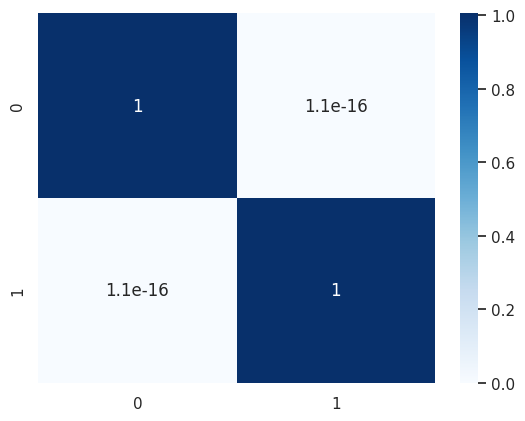

In [44]:
sns.heatmap(np.cov(X_new.T),annot=True,cmap='Blues')

In [45]:
#Cool we dropping the multicolinearty with this one

In [48]:
X_new1=sm.add_constant(X_new)
sm.OLS(y,X_new1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9318.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          8.41e-196
Time:                        14:58:57   Log-Likelihood:                -63.077
No. Observations:                 200   AIC:                             132.2
Df Residuals:                     197   BIC:                             142.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2827      0.024    -11.961      0.000      -0.329      -0.236
x1             0.5200      0.024     22.005      0.000       0.473       0.567
x2             3.1839      0.024    134.729      0.000       3.137       3.231
==============================================================================
Omnibus:                        1.612   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.698
Skew:                          -0.191   Prob(JB):                        0.428
Kurtosis:                       2.759   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#hmm better